# Exploratory Data Analysis - Gmail Inbox Exploration

### Objective- To perform an exploratory data analysis on Gmail Inbox data, aiming to extract and analyze key data points such as email content, date, day, time, and year. The project aims to gain insights into mail frequency patterns by examining factors such as day of the week, month, and time of the day. Through visualizations and analysis, the project aims to uncover trends, patterns, and correlations within the Gmail Inbox data and provide valuable insights into email communication patterns and behaviors.

#### The data was extracted from a Gmail Inbox and underwent a cleaning process using popular Python libraries such as numpy and pandas, in order to prepare it for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#open csv file
gmail_info_raw=pd.read_csv("email_data_2k.csv")
gmail_info = pd.read_csv("email_data2_2k_cleaned.csv")
#Raw Data
gmail_info_raw.head(5)

,Title,Sender,Sender Email,Date
0,"Cornel West Is a Great Presidential Candidate,...",Medium Daily Digest <noreply@medium.com>,noreply@medium.com,"Mon, 12 Jun 2023 02:10:00 +0000 (UTC)"
1,=?utf-8?B?RmFzdCBmaXhlcyBmb3IgYnVzeSBwZW9wbGUu?=,"""Adobe Acrobat"" <mail@mail.adobe.com>",mail@mail.adobe.com,"Sun, 11 Jun 2023 17:20:39 -0700"
2,=?utf-8?Q?Your_curated_list_of_fresher_jobs_&_...,"""Varsha from Prosple"" <varsha@prosple.com>",varsha@prosple.com,"Sun, 11 Jun 2023 19:23:34 -0500"
3,=?UTF-8?Q?SUPER_PRICE_DROP_on_Flights_Tickets_...,Goibibo <noreply@content.goibibo.com>,noreply@content.goibibo.com,"Sun, 11 Jun 2023 13:26:28 +0530"
4,=?UTF-8?Q?=E2=80=9Cdata_analyst=E2=80=9C:_30+_...,LinkedIn Job Alerts <jobalerts-noreply@linkedi...,jobalerts-noreply@linkedin.com,"Sun, 11 Jun 2023 04:38:41 +0000 (UTC)"


In [2]:
#Clean Data
gmail_info.head(5)

,Unnamed: 0,Firm,Sender Email,Day,Date,Month,Year,Time_24hr_offset,Parts_of_the_day,noreply,Month_year
0,0,Medium Daily Digest,noreply@medium.com,Mon,12,Jun,2023,02:10:00,Night,1,Jun 2023
1,1,Adobe Acrobat,mail@mail.adobe.com,Sun,11,Jun,2023,00:20:39,Night,0,Jun 2023
2,2,Varsha from Prosple,varsha@prosple.com,Sun,11,Jun,2023,04:23:34,Night,0,Jun 2023
3,3,Goibibo,noreply@content.goibibo.com,Sun,11,Jun,2023,08:56:28,Morning,1,Jun 2023
4,4,LinkedIn,jobalerts-noreply@linkedin.com,Sun,11,Jun,2023,04:38:41,Night,1,Jun 2023


### Which Company/Organization mailed the most? 

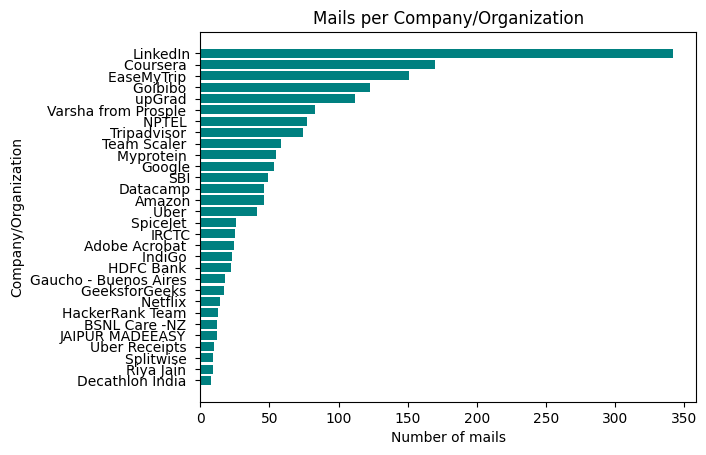

In [3]:
top_companies=gmail_info['Firm'].value_counts().head(30)
y=top_companies.index[::-1]
x=top_companies.values[::-1]
plt.barh(y,x,color="teal")

plt.xlabel('Number of mails')
plt.ylabel('Company/Organization')
plt.title('Mails per Company/Organization')

plt.show()

#### LikedIn have most number of mails and wins handsomely. Alot of education organisations like Coursera,upGrad,Datacamp shows involvement in studies and/or preparations . We can also see EaseMytrip, GoIbibo and other travel booking companies which might depict interest in traveling as well

### What is the most common part of the day for recieving mails? 

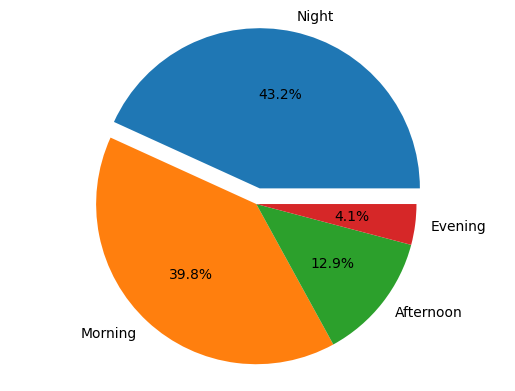

In [4]:
parts_of_the_day=gmail_info['Parts_of_the_day']
day_parts= parts_of_the_day.value_counts()
explode=[0.1,0,0,0]
plt.pie(day_parts,explode=explode,labels=day_parts.index[:len(day_parts)],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### It's observed that almost 80% of mails are recieved in early hours of the clock. Most probable stretagy could be the human tendency to begin the day with checking and replying emails. As mails are generated by scheduled servers, cost could also be a factor.

### The analysis reveals that Monday and Tuesday experience higher email activity compared to the rest of the week

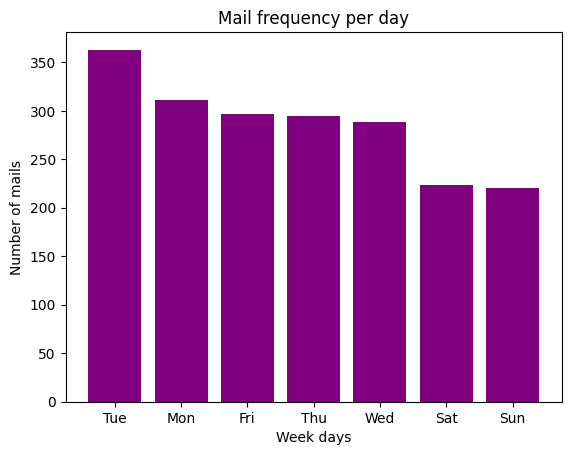

In [5]:
weekdays=gmail_info['Day'].value_counts()
plt.bar(weekdays.index,weekdays.values,color='purple')
plt.xlabel('Week days')
plt.ylabel('Number of mails')
plt.title('Mail frequency per day')
plt.show()

#### To maximize attention and engagement, companies often choose Monday and Tuesday as the most active and busiest days of the week. This is due to observation that people tend to be more focused and responsive during the early days of the week. In contrast, weekends are generally considered less productive.

### Despite majority of mails are non-replyable,almost a quarter of mails contain 'noreply' in their IDs

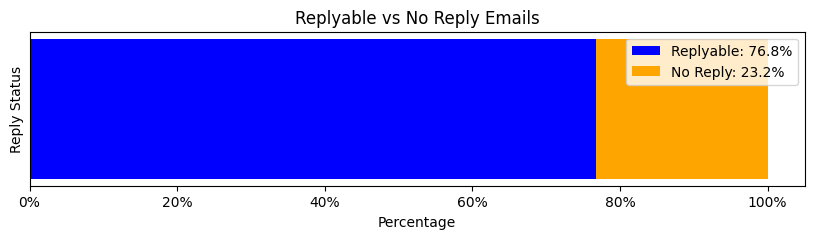

In [6]:
noreply_counts = gmail_info['noreply'].value_counts()

labels = ['Replyable', 'No Reply']
colors = ['blue', 'orange']

plt.figure(figsize=(10, 2))  

# Calculate percentages
total_count = sum(noreply_counts)
percentages = [(count / total_count) * 100 for count in noreply_counts]

plt.barh(0, percentages[0], color=colors[0], label=f'{labels[0]}: {percentages[0]:.1f}%')
plt.barh(0, percentages[1], color=colors[1], left=percentages[0], label=f'{labels[1]}: {percentages[1]:.1f}%')

plt.xlabel('Percentage')
plt.ylabel('Reply Status')
plt.title('Replyable vs No Reply Emails')
plt.legend()
plt.yticks([])

# Set x-axis tick format as percentage
#plt.gca().xaxis.set_major_formatter(plt.PercentFormatter())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()


#### A 'noreply' mail is generally ignorable, so we can relax with urgency to check and reply mails

### Monthly Email Frequency

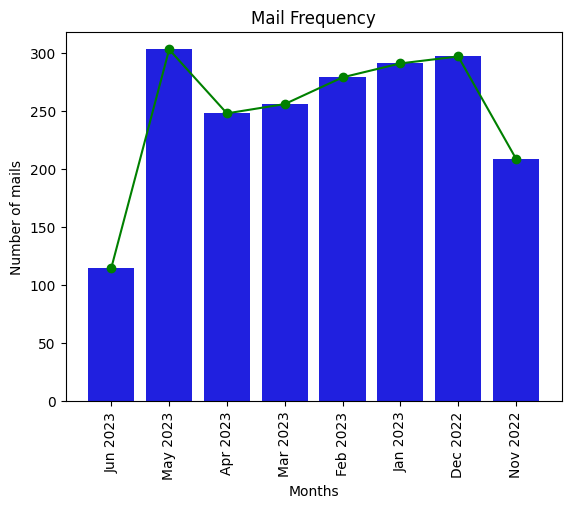

In [7]:
month_values=gmail_info['Month_year'].value_counts(sort=False)
month_index=gmail_info['Month_year'].value_counts(sort=False).index
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the bar graph using Seaborn
sns.barplot(x=month_index, y=month_values, ax=ax, color='blue')

# Plot the line graph using Matplotlib
ax.plot(month_index, month_values, marker='o', linestyle='-', color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Set labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Number of mails')
ax.set_title('Mail Frequency')

# Show legend
#ax.legend()

# Display the plot
plt.show()


#### The data is collected upto 12th June 2023, hence shows less number of mails in June 2023. Less Activities are shown in the month of March and April as these are closing months of financial years. December and January see holidays and peak months for exam preparations, so Inbox activity is seen at higher side in them.